# Modeling a region of the chromatin

## Load previous data

In [1]:
from pytadbit import load_chromosome

/home/fransua/.miniconda2/lib/python2.7/site-packages/matplotlib/__init__.py:1357: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [2]:
crm = load_chromosome('results/fragment/crm18.tdb')

In [3]:
t0, t60 = crm.experiments

In [4]:
t0

Experiment T0 (resolution: 100 kb, TADs: 53, Hi-C rows: 804, normalized: None)

Load raw data matrices, and normalized matrices

In [6]:
t60.load_hic_data('results/fragment/both_T60/04_normalizing/100000_raw/18.mat')
t60.load_norm_data('results/fragment/both_T60/04_normalizing/100000_norm/18.mat')

t0.load_hic_data('results/fragment/both_T0/04_normalizing/100000_raw/18.mat')
t0.load_norm_data('results/fragment/both_T0/04_normalizing/100000_norm/18.mat')

## Modeling

We use the best parameters obtained from the optimization:

In [7]:
optimal_params = {'dcutoff': 2.0,
                  'kforce': 5,
                  'lowfreq': -0.6,
                  'maxdist': 2000.0,
                  'reference': 'Le Dily et al. 2014',
                  'scale': 0.01,
                  'upfreq': 0.0}

In [8]:
models_t0 = t0.model_region(start=685, end=750, n_models=400, n_keep=100, n_cpus=8,
                            config=optimal_params)

In [112]:
models_t60 = t60.model_region(start=685, end=750, n_models=400, n_keep=100, n_cpus=8,
                              config=optimal_params)

In [9]:
print models_t0

StructuralModels with 100 models of 66 particles
   (objective function range: 60931646 - 64836888)
   (corresponding to the best models out of 100 models).
  IMP modeling used this parameters:
   - maxdist     : 2000.0
   - scale       : 0.01
   - dcutoff     : 2.0
   - kforce      : 5
   - reference   : Le Dily et al. 2014
   - lowfreq     : -0.6
   - upfreq      : 0.0
   - lowrdist    : 1000.0
   - container   : {'shape': None, 'radius': None, 'cforce': None, 'height': None}
  Models where clustered into 0 clusters


We still can access to the experiment object from the 3D models:

In [10]:
print models_t0.experiment

Experiment T0 (resolution: 100 kb, TADs: 53, Hi-C rows: 804, normalized: visibility)

## Structural Models

The definition of the "best models" can be changed at any time:

 - Select top 10 models

In [11]:
models_t0.define_best_models(10)
print "Lowest 10 IMP OF models:"
print models_t0

Lowest 10 IMP OF models:
StructuralModels with 10 models of 66 particles
   (objective function range: 60931646 - 61300404)
   (corresponding to the best models out of 100 models).
  IMP modeling used this parameters:
   - maxdist     : 2000.0
   - scale       : 0.01
   - dcutoff     : 2.0
   - kforce      : 5
   - reference   : Le Dily et al. 2014
   - lowfreq     : -0.6
   - upfreq      : 0.0
   - lowrdist    : 1000.0
   - container   : {'shape': None, 'radius': None, 'cforce': None, 'height': None}
  Models where clustered into 0 clusters


 - Select top 100 models

In [12]:
models_t0.define_best_models(100)
print "Lowest 100 IMP OF models:"
print models_t0

Lowest 100 IMP OF models:
StructuralModels with 100 models of 66 particles
   (objective function range: 60931646 - 64836888)
   (corresponding to the best models out of 100 models).
  IMP modeling used this parameters:
   - maxdist     : 2000.0
   - scale       : 0.01
   - dcutoff     : 2.0
   - kforce      : 5
   - reference   : Le Dily et al. 2014
   - lowfreq     : -0.6
   - upfreq      : 0.0
   - lowrdist    : 1000.0
   - container   : {'shape': None, 'radius': None, 'cforce': None, 'height': None}
  Models where clustered into 0 clusters


 - Get the data for the lowest IMP OF model (number 0) in the set of models

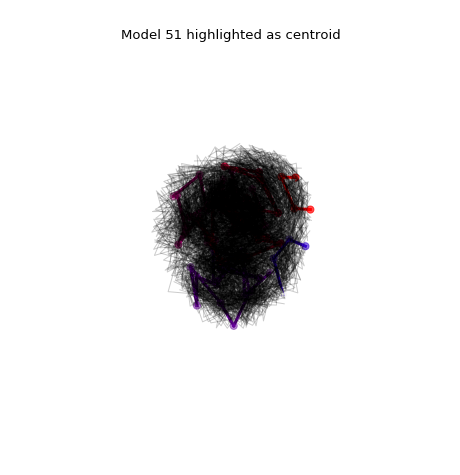

In [84]:
models_t0.view_models(tool='plot', color='tad')

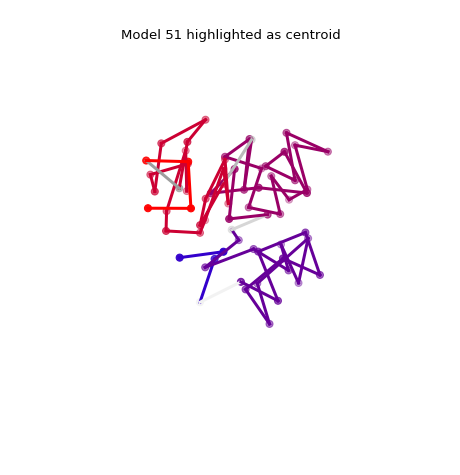

In [110]:
models_t0.view_models(models=[0], tool='plot', color='tad', azimuth=40, elevation=20)

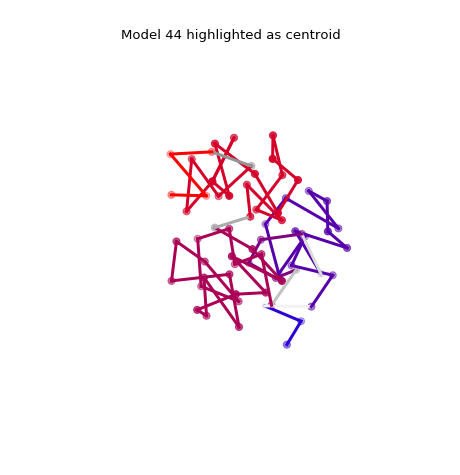

In [113]:
models_t60.view_models(models=[0], tool='plot', color='tad', azimuth=40, elevation=20)

In [13]:
model = models_t0[0]
print model

IMP model ranked 1 (66 particles) with: 
 - Final objective function value: 60931646.5478
 - random initial value: 51
 - first coordinates:
        X      Y      Z
    -6895  -1779 -10396
    -7282   -895 -10235
    -7689  -1698 -10693



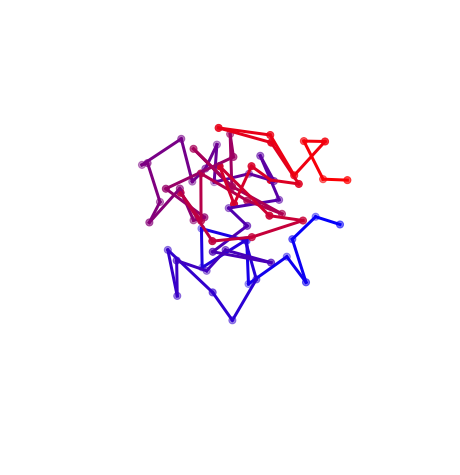

In [87]:
model.view_model(tool='plot')

Get the IMP OF of the stored model in "model":

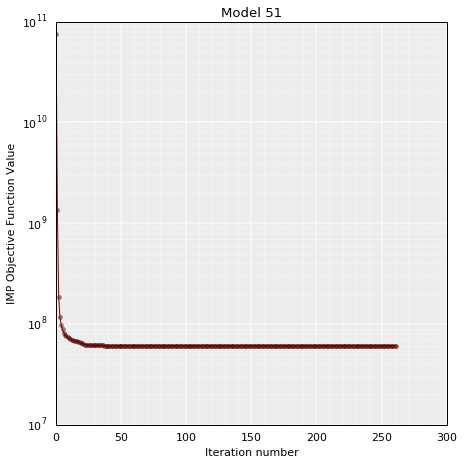

In [16]:
model.objective_function(log=True, smooth=False)

Calculate the correlation coefficient between a set of kept models and the original HiC matrix

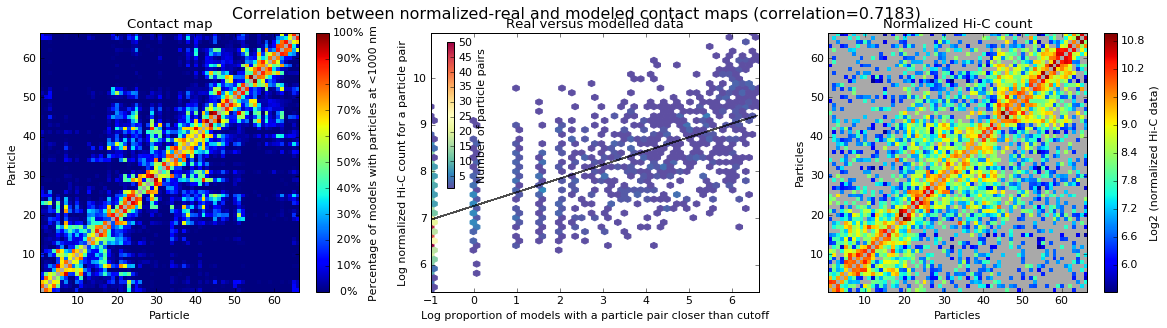

SpearmanrResult(correlation=0.71825885942685008, pvalue=4.3386907446672612e-200)

In [17]:
models_t0.correlate_with_real_data(plot=True, cutoff=1000)

To have a look at the data that was used to define restraints:

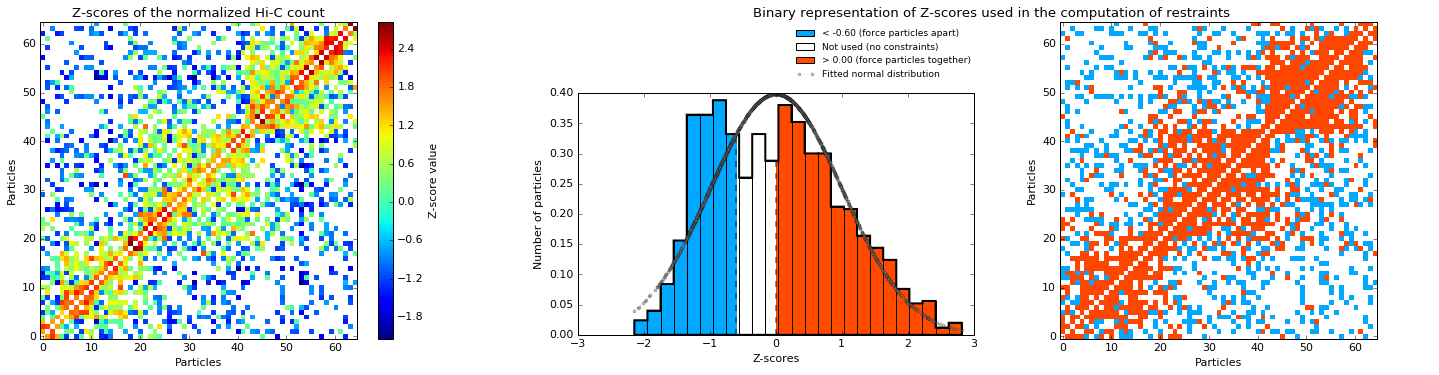

In [18]:
models_t0.zscore_plot()

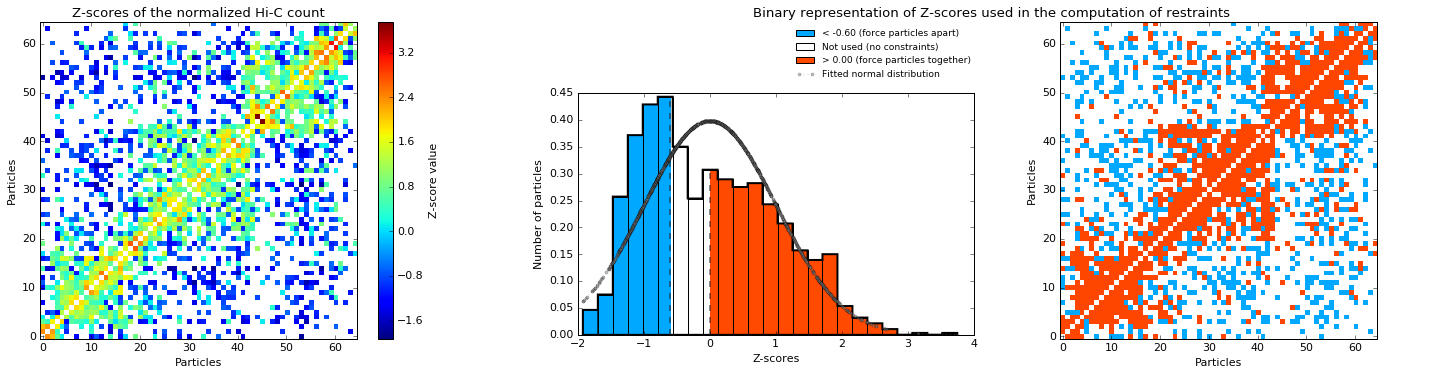

In [114]:
models_t60.zscore_plot()

Total number of clusters: 5
   Cluster #1 has 4 models [top model: 275]
   Cluster #2 has 4 models [top model: 381]
   Cluster #3 has 2 models [top model: 349]
   Cluster #4 has 2 models [top model: 51]
   Cluster #5 has 2 models [top model: 10]



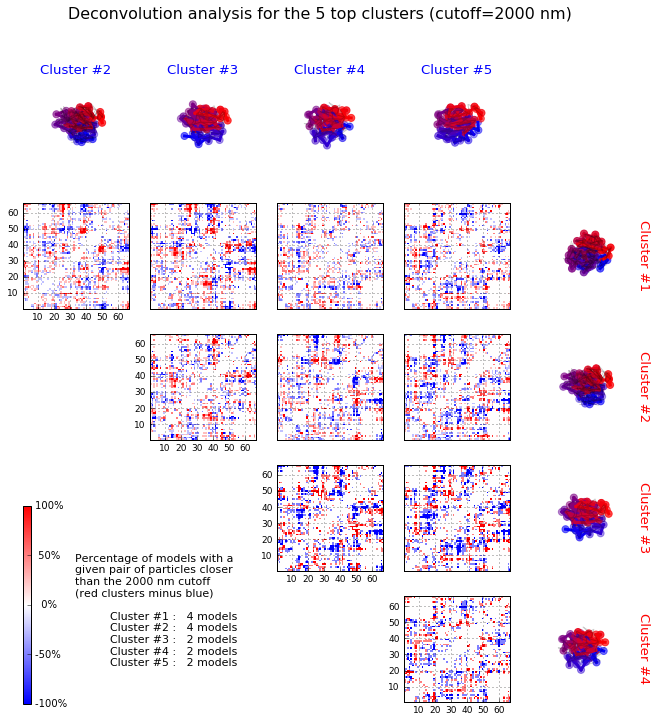

In [25]:
models_t0.align_models(in_place=True)
models_t0.deconvolve(fact=0.45, dcutoff=2000, represent_models='best', n_best_clusters=5)

In [123]:
# Cluster models based on structural similarity
models_t0.cluster_models(fact=0.75, dcutoff=1000)
print models_t0.clusters

Number of singletons excluded from clustering: 0 (total singletons: 0)
Total number of clusters: 4
   Cluster #1 has 28 models [top model: 51]
   Cluster #2 has 26 models [top model: 275]
   Cluster #3 has 26 models [top model: 349]
   Cluster #4 has 20 models [top model: 93]

Total number of clusters: 4
   Cluster #1 has 28 models [top model: 51]
   Cluster #2 has 26 models [top model: 275]
   Cluster #3 has 26 models [top model: 349]
   Cluster #4 has 20 models [top model: 93]



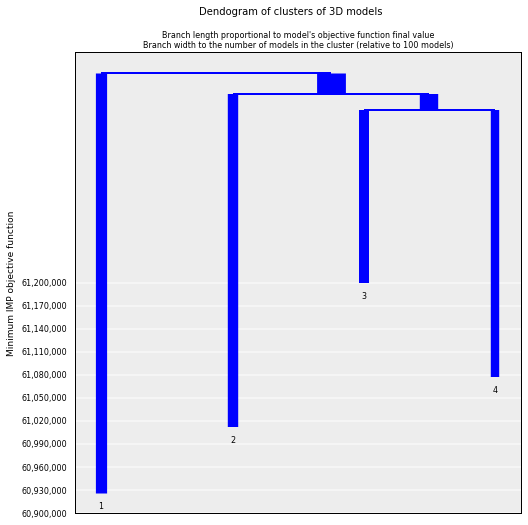

In [118]:
# Plot the resulting clusers
cl = models_t0.cluster_analysis_dendrogram(color=True)

In [121]:
# Cluster models based on structural similarity
models_t60.cluster_models(fact=0.75, dcutoff=1000)
print models_t60.clusters

Number of singletons excluded from clustering: 0 (total singletons: 0)
Total number of clusters: 2
   Cluster #1 has 52 models [top model: 349]
   Cluster #2 has 48 models [top model: 44]

Total number of clusters: 2
   Cluster #1 has 52 models [top model: 349]
   Cluster #2 has 48 models [top model: 44]



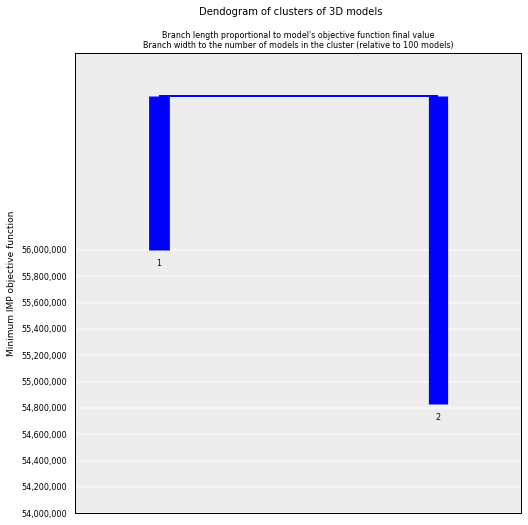

In [122]:
# Plot the resulting clusers
cl = models_t60.cluster_analysis_dendrogram(color=True)

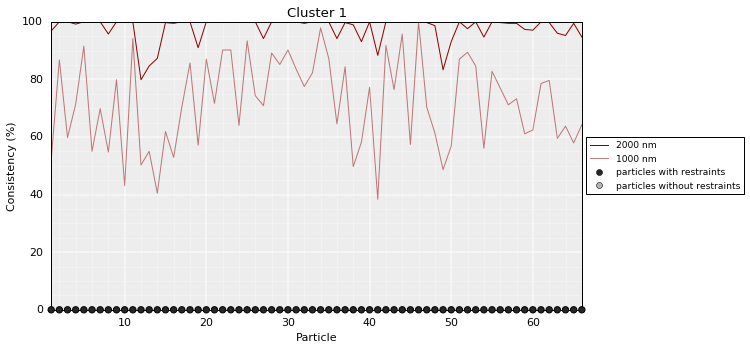

In [50]:
# Calculate the consistency plot for all models in the first cluster (cluster 0)
models_t0.model_consistency(cluster=1, cutoffs=(1000,2000))

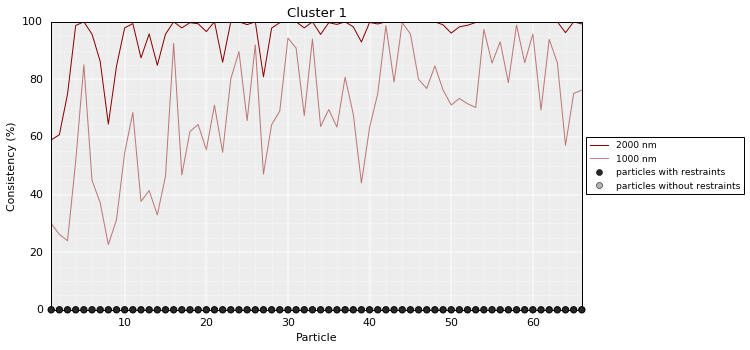

In [124]:
# Calculate the consistency plot for all models in the first cluster (cluster 0)
models_t60.model_consistency(cluster=1, cutoffs=(1000,2000))

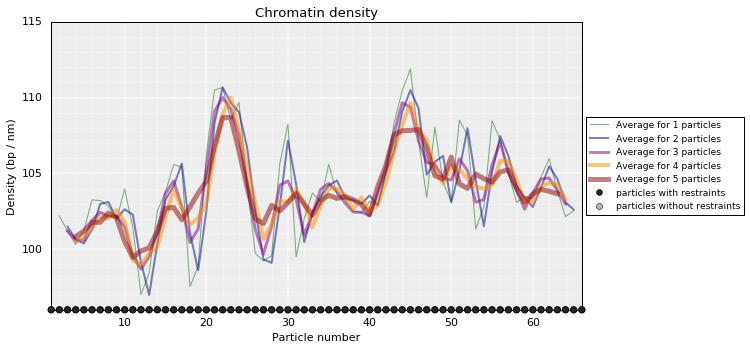

In [52]:
# Calculate a DNA density plot
models_t0.density_plot()

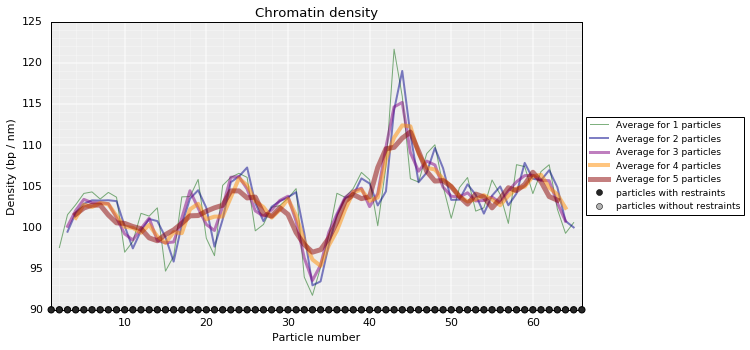

In [125]:
# Calculate a DNA density plot
models_t60.density_plot()

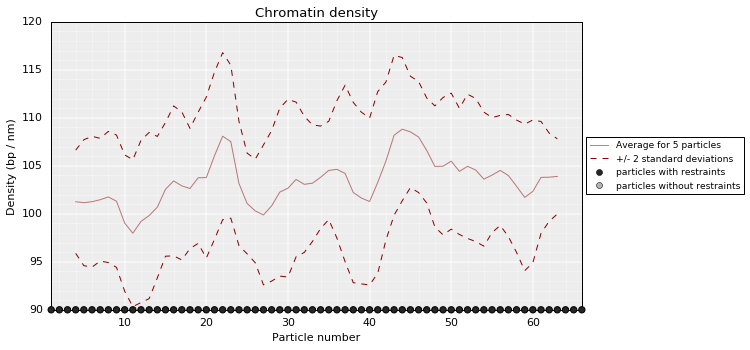

In [54]:
# Get a similar plot for only the top cluster and show the standar deviation for a specific(s) running window (steps)
models_t0.density_plot(cluster=1,error=True, steps=(5))

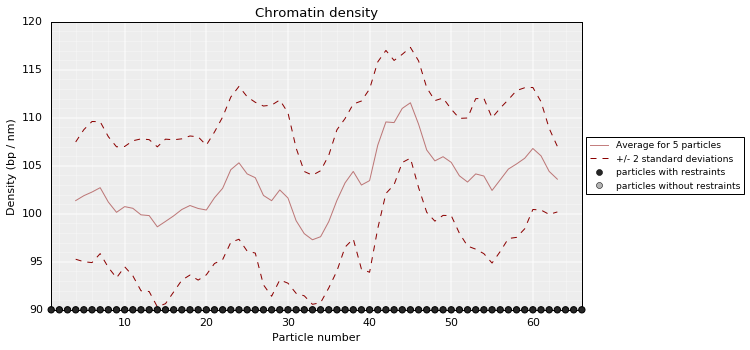

In [126]:
# Get a similar plot for only the top cluster and show the standar deviation for a specific(s) running window (steps)
models_t60.density_plot(cluster=1,error=True, steps=(5))

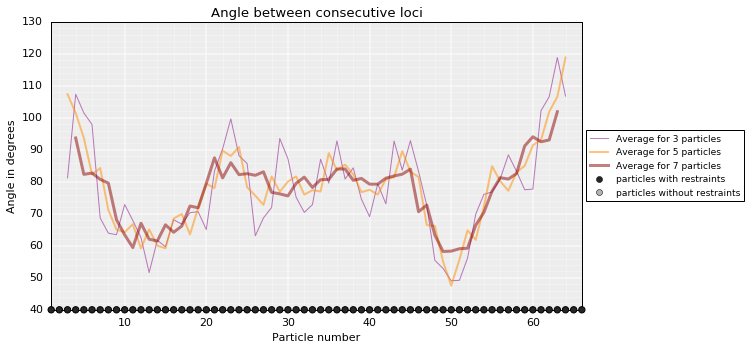

In [55]:
models_t0.walking_angle(steps=(3, 5, 7), signed=False)

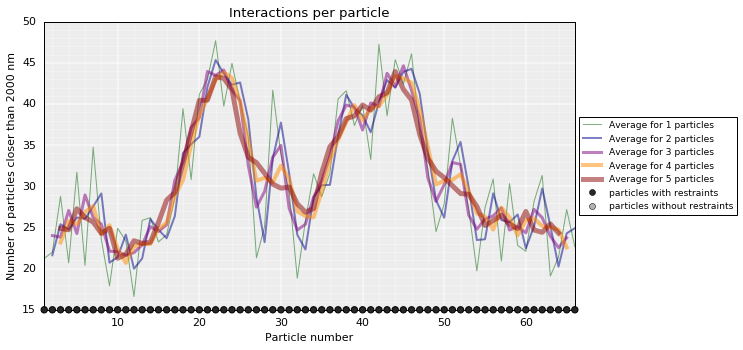

In [56]:
models_t0.interactions(cutoff=2000)

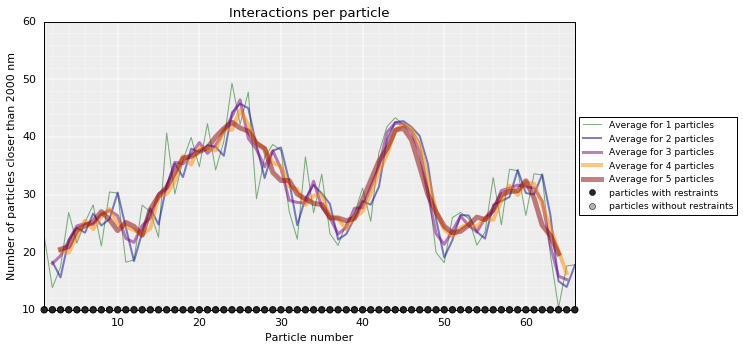

In [127]:
models_t60.interactions(cutoff=2000)

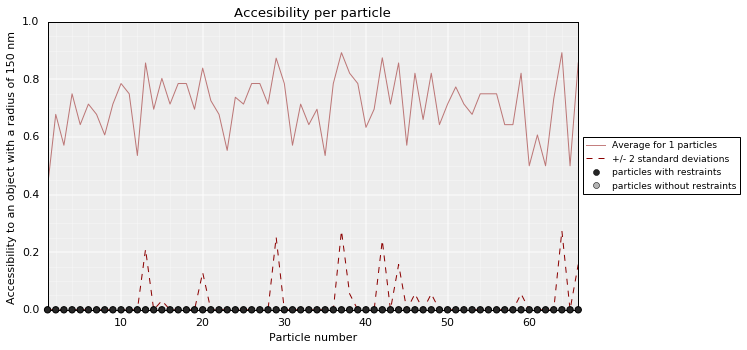

In [82]:
models_t0.accessibility(cluster=1, radius=150, nump=10, superradius=300)

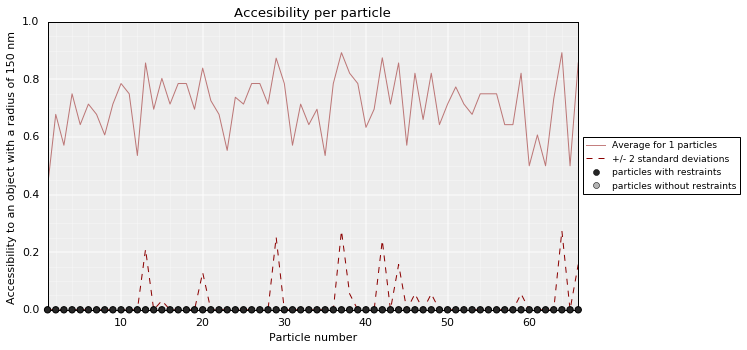

In [82]:
models_t0.accessibility(cluster=1, radius=150, nump=10, superradius=300)

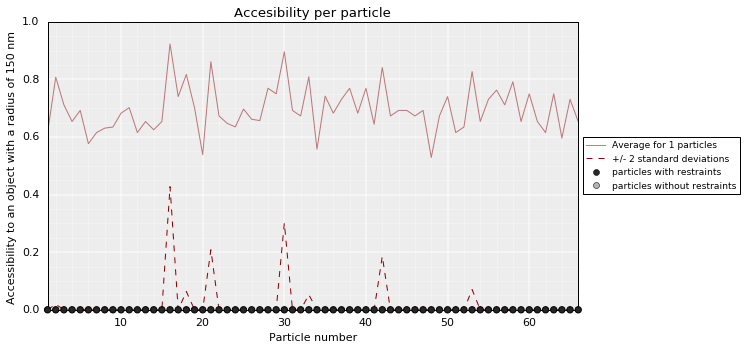

In [128]:
models_t60.accessibility(cluster=1, radius=150, nump=10, superradius=300)

In [57]:
models_t0.contact_map(models=range(5,10), cutoff=1200, savedata="contact.txt")

In [58]:
models_t0.median_3d_dist(13, 20, plot=False)

1251.6207867711228

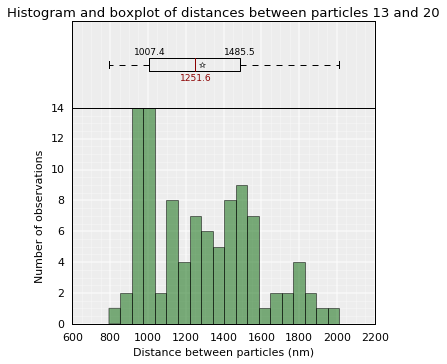

In [61]:
models_t0.median_3d_dist(13, 20, plot=True)

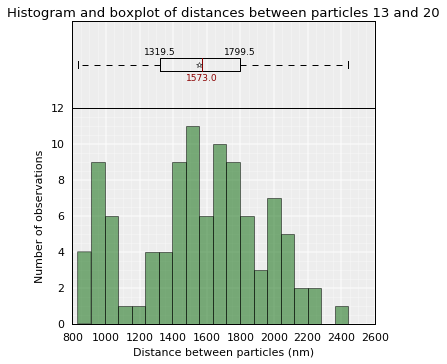

In [129]:
models_t60.median_3d_dist(13, 20, plot=True)

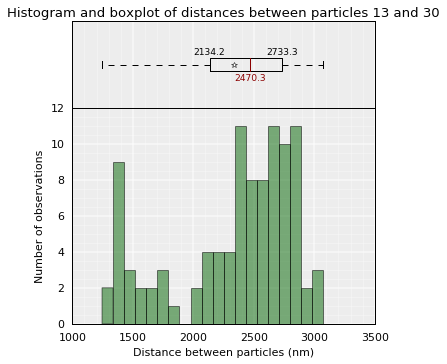

In [63]:
models_t0.median_3d_dist(13, 30, models=range(100))

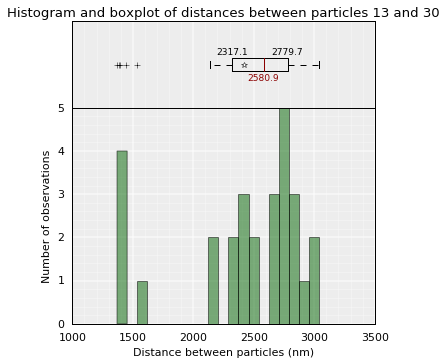

In [64]:
models_t0.median_3d_dist(13, 30, cluster=1)

In [65]:
# Save your entire analysis and models
models_t0.save_models('T0.models')

In [67]:
from pytadbit import load_structuralmodels

In [68]:
# Load the models
loaded_models = load_structuralmodels('T0.models')
print loaded_models

StructuralModels with 100 models of 66 particles
   (objective function range: 60931646 - 64836888)
   (corresponding to the best models out of 100 models).
  IMP modeling used this parameters:
   - maxdist     : 2000.0
   - scale       : 0.01
   - dcutoff     : 2.0
   - kforce      : 5
   - reference   : Le Dily et al. 2014
   - lowfreq     : -0.6
   - upfreq      : 0.0
   - lowrdist    : 1000.0
   - container   : {'shape': None, 'radius': None, 'cforce': None, 'height': None}
  Models where clustered into 4 clusters


In [71]:
! mkdir -p results/models_t0

In [74]:
# Write a CMM file for the top model
models_t0.write_cmm(directory="results/models_t0", model_num=0)
# Write CMM ofcentroid model
models_t0.write_cmm(directory="results/models_t0", model_num=models_t0.centroid_model(cluster=1))
# Write a XYZ file for the top model
models_t0.write_xyz(directory="results/models_t0", model_num=0)
# Write a XYZ file for the top 10 models
models_t0.write_xyz(directory="results/models_t0", models=range(10))
# Write a XYZ file for the cluster 1 models
models_t0.write_xyz(directory="results/models_t0", cluster=1)